In [ ]:
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
import plotly.express as px
from wordcloud import WordCloud
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
from tensorflow.keras import layers
import string
import tensorflow as tf

In [ ]:
df_fake = pd.read_csv('Fake.csv')
df_true = pd.read_csv('True.csv')

In [ ]:
df_fake.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [ ]:
df_true.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [ ]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [ ]:
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [ ]:
df_fake.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [ ]:
df_true.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [ ]:
sub = dataset.groupby('subject').count()['title']
print(sub)
plt.figure(figsize=(10,10))
px.pie(dataset['subject'],names=dataset['subject'],title='Subject')

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: title, dtype: int64


<Figure size 1000x1000 with 0 Axes>

In [ ]:
x = clean_data.iloc[:,0]
y = clean_data['True']
print('x : \n' ,x[:10],'\n y :\n' ,y[:10])

x : 
 0    WASHINGTON (Reuters) - The head of a conservat...
1    WASHINGTON (Reuters) - Transgender people will...
2    WASHINGTON (Reuters) - The special counsel inv...
3    WASHINGTON (Reuters) - Trump campaign adviser ...
4    SEATTLE/WASHINGTON (Reuters) - President Donal...
5    WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...
6    WEST PALM BEACH, Fla (Reuters) - President Don...
7    The following statements were posted to the ve...
8    The following statements were posted to the ve...
9    WASHINGTON (Reuters) - Alabama Secretary of St...
Name: text, dtype: object 
 y :
 0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: True, dtype: int64


In [ ]:
wordgroup = "".join(chars)
wordgroup[0:140]

'WASHINGTON Reuters  The head of a conservative Republican faction in the US Congress who voted this month for a huge expansion of the nation'

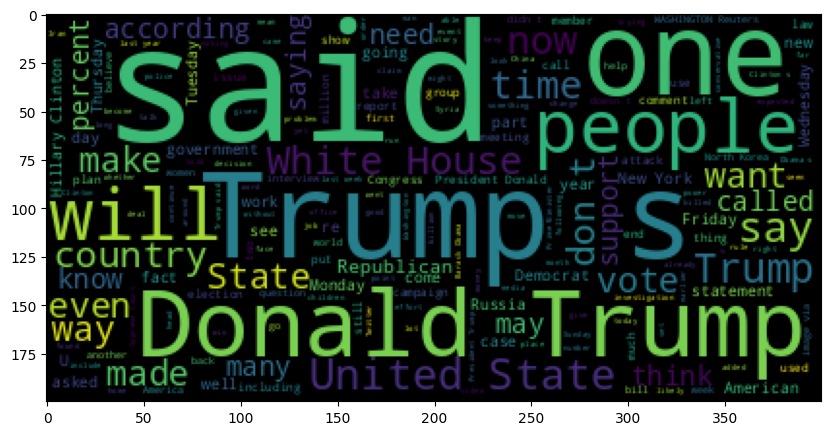

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(WordCloud().generate(wordgroup))

In [ ]:
print('number of words : ',len([word for word in wordgroup.split()]))

number of words :  18140003


In [ ]:
samp = clean_data.sample(n=3000)
samp

,text,True
5518,Former New York City mayor Rudy Giuliani told ...,0
22832,21st Century Wire says The war between the Whi...,0
13610,In their desire to push Hillary Clinton across...,0
19907,GUATEMALA CITY (Reuters) - Guatemala s Congres...,1
17404,This story should send chills down the spine o...,0
...,...,...
12790,#TrumpTrain??????????@realDonaldTrump isn t go...,0
5409,WASHINGTON (Reuters) - The U.S. Senate on Thur...,1
3288,WASHINGTON (Reuters) - U.S. President Donald T...,1
8946,WASHINGTON (Reuters) - Republican U.S. Senator...,1


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
imp_word =[word.lower() for word in words if word not in stopwords.words('english')]
imp_word[0:20]

['former',
 'new',
 'york',
 'city',
 'mayor',
 'rudy',
 'giuliani',
 'told',
 'black',
 'fathers',
 'worried',
 'safety',
 'sons',
 'real',
 'danger',
 'police',
 'officers.',
 'oh',
 'no,',
 'course']

### Inserting a column "class" as target feature

In [ ]:
df_fake["class"] = 0
df_true["class"] = 1

In [ ]:
df_fake.shape, df_true.shape

((23481, 6), (21417, 6))

In [ ]:
# Removing last 10 rows for manual testing
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470,-1):
    df_fake.drop([i], axis = 0, inplace = True)


df_true_manual_testing = df_true.tail(10)
for i in range(21416,21406,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [ ]:
df_fake.shape, df_true.shape

((23471, 6), (21407, 6))

In [ ]:
df_fake_manual_testing["class"] = 0
df_true_manual_testing["class"] = 1

<ipython-input-38-3aaf8ec2aad1>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-38-3aaf8ec2aad1>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_fake_manual_testing.head(10)

,title,text,subject,date,True,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0,0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0,0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0,0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0,0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0,0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0,0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0,0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0,0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0,0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0,0


In [ ]:
df_true_manual_testing.head(10)

,title,text,subject,date,True,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1,1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1,1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1,1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1,1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1,1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1,1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1,1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1,1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1,1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1,1


In [ ]:
df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)
df_manual_testing.to_csv("manual_testing.csv")

### Merging True and Fake Dataframes

In [ ]:
df_merge = pd.concat([df_fake, df_true], axis =0 )
df_merge.head(10)

,title,text,subject,date,True,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0,0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0,0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0,0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0,0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0,0


In [ ]:
df_merge.columns

Index(['title', 'text', 'subject', 'date', 'True', 'class'], dtype='object')

### Removing columns which are not required

In [ ]:
df = df_merge.drop(["title", "subject","date"], axis = 1)

In [ ]:
df.isnull().sum()

text     0
True     0
class    0
dtype: int64

### Random Shuffling the dataframe

In [ ]:
df = df.sample(frac = 1)

In [ ]:
df.head()

,text,True,class
13215,AMMAN (Reuters) - A state security court in Jo...,1,1
17888,TOKYO (Reuters) - Japan s Yuriko Koike says sh...,1,1
15867,SEOUL (Reuters) - North Korea may be planning ...,1,1
20649,"I am deeply offended by your campaign, since ...",0,0
20648,The difference between us and them is that we...,0,0


In [ ]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [ ]:
df.columns

Index(['text', 'True', 'class'], dtype='object')

In [ ]:
df.head

<bound method NDFrame.head of                                                     text  True  class
0      AMMAN (Reuters) - A state security court in Jo...     1      1
1      TOKYO (Reuters) - Japan s Yuriko Koike says sh...     1      1
2      SEOUL (Reuters) - North Korea may be planning ...     1      1
3       I am deeply offended by your campaign, since ...     0      0
4       The difference between us and them is that we...     0      0
...                                                  ...   ...    ...
44873  Apparently, the fact that 70 percent of women ...     0      0
44874  SANTIAGO (Reuters) - Billionaire and ex-presid...     1      1
44875   Washingtons BlogEveryone s talking about  fak...     0      0
44876  Wouldn t it be great if our first  Black  Pres...     0      0
44877  Anti-Trump Activist says what everyone on the ...     0      0

[44878 rows x 3 columns]>

### Creating a function to process the texts

In [ ]:
import re

In [ ]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
df["text"] = df["text"].apply(wordopt)

### Defining dependent and independent variables

In [ ]:
x = df["text"]
y = df["class"]

### Splitting Training and Testing

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

# Applying Algorithm

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [ ]:
pred_lr=LR.predict(xv_test)

In [ ]:
LR.score(xv_test, y_test)

0.9853832442067736

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import string

In [ ]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5862
           1       0.98      0.99      0.98      5358

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



### Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [ ]:
pred_dt = DT.predict(xv_test)

In [ ]:
DT.score(xv_test, y_test)

0.9964349376114082

In [ ]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5862
           1       1.00      1.00      1.00      5358

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



In [ ]:
import joblib

# Save the decision tree model
joblib.dump(DT, 'DT.joblib')


['DT.joblib']

In [ ]:
import h5py

# Save the decision tree model as an .h5 file
with h5py.File('DT.h5', 'w') as f:
    f.create_dataset('model_weights', data=DT.tree_.threshold)
    f.create_dataset('model_values', data=DT.tree_.value)
    f.create_dataset('model_features', data=DT.tree_.feature)
    f.create_dataset('model_children_left', data=DT.tree_.children_left)
    f.create_dataset('model_children_right', data=DT.tree_.children_right)


In [ ]:
import joblib

# Save the decision tree model
joblib.dump(DT, 'DT.joblib')

['DT.joblib']

### Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
pred_gbc = GBC.predict(xv_test)

In [ ]:
GBC.score(xv_test, y_test)

0.9952762923351158

In [ ]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5862
           1       0.99      1.00      1.00      5358

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)
joblib.dump(RFC, 'RFC_model.h5')


['RFC_model.h5']

In [ ]:
loaded_RFC_model = joblib.load('RFC_model.h5')

# Use the loaded model to make predictions
pred_rfc = loaded_RFC_model.predict(xv_test)

In [ ]:
RFC.score(xv_test, y_test)

0.9905525846702318

In [ ]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5862
           1       0.99      0.99      0.99      5358

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



### Model Testing

In [ ]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "True News"

def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {}  \nRFC Prediction: {}".format(output_lable(pred_LR[0]),
                                                                      output_lable(pred_RFC[0])))

In [ ]:
news = str(input())
manual_testing(news)

WASHINGTON — In the aftermath of ethics questions emerging around Justice Clarence Thomas and a series of politically charged rulings, a coalition of more than 30 progressive groups plans to initiate next week a new nationwide campaign calling for structural changes to the Supreme Court.  The effort will include progressive leaders and organizations that have not previously been engaged in the push to overhaul the court, including by imposing term limits on justices or increasing their numbers. But leaders of the organizations say they now see the need to spur a larger public discussion about the role of the court in American life.  “This is new to us,” said Mini Timmaraju, the president of NARAL Pro-Choice America. She said her organization’s decision to join the campaign was driven in part by recent court decisions on abortion rights, gun control and other issues that run counter to well-documented public opinion.  “We feel a special obligation to jump in now,” she said. “It feels th

In [ ]:
news=str(input())
manual_testing(news)

Fake images created by artificial intelligence (AI) tools depicting Donald Trump have appeared on social media over the past week.  Many falsely showed the arrest of the former president, who may face indictment over payment of hush money to a woman he allegedly had an affair with. He has not yet been charged with a crime.  Many of those sharing the images pointed out they were fake, and they did not appear to fool lots of people - but a few did seem to be tricked.  On Thursday, Mr Trump also shared an AI-generated image on his own social media platform Truth Social. It showed him kneeling in prayer.  What are some of the tell-tale signs of AI-generated imagery? And how can you distinguish a real from a fake?


LR Prediction: Fake News  
RFC Prediction: Fake News


## *Extract text from Image*

### using pipeline

In [ ]:
!apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2build2).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
import shutil
import random
import pytesseract
try:
    from PIL import Image
except ImportError:
     import Image

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
image_path = '/content/fake1.jpg'

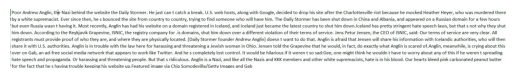

In [ ]:
image_orignal=cv2.imread(image_path)
plt.imshow(image_orignal)
plt.axis("off")
plt.show()

In [ ]:
image_path_in_colab=image_path
extractedInformation = pytesseract.image_to_string(Image.open(image_path_in_colab))
# print(extractedInformation)

### Testing from the image input

#### Fake news

In [ ]:
news=str(extractedInformation)
manual_testing(news)



LR Prediction: Fake News  
RFC Prediction: Fake News


#### True News

In [ ]:
image_path1 = '/content/true.jpg'

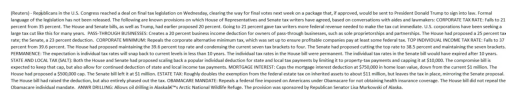

In [ ]:
image_orignal_true=cv2.imread(image_path1)
plt.imshow(image_orignal_true)
plt.axis("off")
plt.show()

In [ ]:
image_path_in_colab1=image_path1
extractedInformation_1 = pytesseract.image_to_string(Image.open(image_path_in_colab1))

In [ ]:
news=str(extractedInformation_1)
manual_testing(news)